# aim= perform and implement gradient descent in multilayer neural dataset using wine data set



In [54]:
import numpy as np
import pandas as pd
from Ipython.display import display

ModuleNotFoundError: No module named 'Ipython'

In [55]:
df=pd.read_csv('wine.csv')

In [56]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
import tensorflow as tf
from tensorflow import keras


In [58]:
df_train=df.sample(frac=0.7,random_state=0)
df_valid=df.drop(df_train.index)
display(df_train.head(4))

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1109,1110,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,1033,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,1003,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,488,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [59]:
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)
df_train=(df_train-min_)/(max_ - min_)
df_valid=(df_valid -min_)/(max_ -min_)

In [60]:
x_train=df_train.drop('quality',axis=1)
x_valid=df_valid.drop('quality',axis=1)
y_train=df_train['quality']
y_valid=df_valid['quality']

In [61]:
x_train.shape

(1119, 12)

In [62]:
from tensorflow import keras
from tensorflow.keras import layers



In [63]:
model=keras.Sequential([
    layers.Dense(520,activation='relu',input_shape=[12]),
    layers.Dense(520,activation='relu'),
    layers.Dense(520,activation='relu'),
    layers.Dense(1),
])

In [64]:
model.compile(
optimizer='adam',
loss='mae'
)

In [65]:
history=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),batch_size=256,epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 45ms/step - loss: 0.2746 - val_loss: 0.1339
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1395 - val_loss: 0.1224
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1236 - val_loss: 0.1204
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1167 - val_loss: 0.1094
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1112 - val_loss: 0.1150
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1084 - val_loss: 0.1053
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1084 - val_loss: 0.1034
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1059 - val_loss: 0.1078
Epoch 9/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1031 - val_loss: 0.1013
Epoch 10/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1013 - val_loss: 0.1052


<AxesSubplot:>

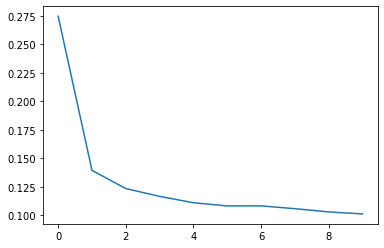

In [66]:
history_df=pd.DataFrame(history.history)
history_df['loss'].plot()

In [67]:
model.compile(optimizer='rmsprop',loss='mae')

In [68]:
history=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),batch_size=2560,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 537ms/step - loss: 0.1017 - val_loss: 0.5667
Epoch 2/5
1/1 [==============================] - 0s 68ms/step - loss: 0.5805 - val_loss: 0.2199
Epoch 3/5
1/1 [==============================] - 0s 55ms/step - loss: 0.2081 - val_loss: 0.1105
Epoch 4/5
1/1 [==============================] - 0s 55ms/step - loss: 0.1154 - val_loss: 0.1284
Epoch 5/5
1/1 [==============================] - 0s 60ms/step - loss: 0.1200 - val_loss: 0.1208


<AxesSubplot:>

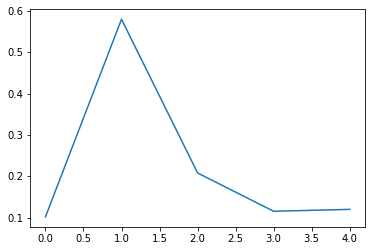

In [69]:
history_df=pd.DataFrame(history.history)
history_df['loss'].plot()

In [70]:
model.compile(optimizer='adagrad',loss='mae',)

In [71]:
history=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),batch_size=2560,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 486ms/step - loss: 0.1317 - val_loss: 0.1184
Epoch 2/5
1/1 [==============================] - 0s 59ms/step - loss: 0.1284 - val_loss: 0.1164
Epoch 3/5
1/1 [==============================] - 0s 58ms/step - loss: 0.1255 - val_loss: 0.1148
Epoch 4/5
1/1 [==============================] - 0s 59ms/step - loss: 0.1230 - val_loss: 0.1134
Epoch 5/5
1/1 [==============================] - 0s 57ms/step - loss: 0.1207 - val_loss: 0.1121


<AxesSubplot:>

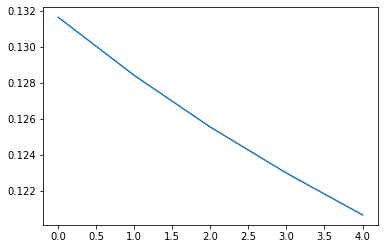

In [72]:
history_df=pd.DataFrame(history.history)
history_df['loss'].plot()